# Many-Worlds vs Copenhagen Interpretation: The thought experiment that first proposed a universal quantum computer, coded with Qiskit

Welcome to the code tutorial for the “Many-Worlds vs Copenhagen” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll show you how to simulate a quantum circuit that distinguishes between the many-worlds theory of quantum mechanics (where observation of a quantum system doesn't cause collapse) and the Copenhagen interpretation of quantum mechanics (where observation causes an irreversible collapse). 
If you haven't already, I recommend you first watch [our video](https://www.youtube.com/watch?v=-YEmRhogaSQ) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. The thought experiment is closely related to the previous two episodes on Schrödinger's cat and Wigner's friend, so I recommend watching those as well. You can find them on the [Paradoxes playlist](https://www.youtube.com/playlist?list=PLOFEBzvs-VvoQP-EVyd5Di3UrPPc2YKIc). I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment.

Before we start coding our thought experiment, let's first summarise the difference between theories where observation causes collapse and those where it does not:


### Collapse vs no-collapse theories 

At the most basic level, the difference between collapse and no-collapse theories of quantum mechanics center on the question of whether measurements of quantum systems are reversible or irreversible.

If measurements are irreversible, then an observer looking inside the box at Schrödinger's cat really does collapse into one state—we'll refer to theories where measurements are irreversible as "collapse theories". The Copenhagen Interpretation is one example of a collapse theory.

On the other hand, if measurements are reversible, then the observer looking inside the box becomes entangled with Schrödinger's cat and they enter a joint superposition. We’ll call theories with reversible measurements "no-collapse" theories.
The many-worlds theory, also known as Everettian quantum mechanics, is just one example of a no-collapse theory. Other no-collapse theories being researched today include Bohmian mechanics and QBism. A common feature of these no-collapse theories is that they suggest quantum theory applies universally at all scales, meaning it applies to detectors, observers and any other macroscopic system.

David Deutsch came up with a thought experiment in 1985 to show that the many-worlds theory is experimentally testable against the Copenhagen Interpretation. Since the thought experiment only depends on whether or not the observer's measurement is reversible, we can actually apply it more broadly to test any no-collapse theory against any collapse theory.

### The thought experiment with a coin analogy 

I like to visualise this thought experiment by imagining a qubit as a coin, which I demonstrate in the video. The coin can be in two states, Heads or Tails, like the qubit can be 0 or 1. But it can also be spinning, which is analogous to a quantum superposition of Heads and Tails. If an observer measures the state of the coin, it is projected into a single outcome of Heads or Tails.

There are two ways the coin can be spinning, clockwise and anti-clockwise. Let's say the coin starts off spinning clockwise. Now an observer measures it and sees a single outcome of Heads or Tails. Next, the observer writes down on a piece of paper the statement "I made a measurement". Importantly, the observer doesn't write down whether they saw Heads or Tails; they just confirm that they did the measurement.

Now let's imagine that an experimenter has control over the observer and the quantum coin, and the experimenter tries to reverse the observer's measurement of the coin. If this works, the coin will go back to spinning clockwise. But if the measurement was in fact irreversible, then the coin will spin in a random direction: half the time clockwise, and half the time anti-clockwise.

When the experimenter has reversed the observer's measurement, the observer no longer has any memory of their measurement outcome. However, the observer can see from the piece of paper that they really did make a measurement of the coin.

If the experimenter runs this experiment lots of times and the coin is always clockwise, then the experimenter and observer must both agree that measurements are reversible. If, on the other hand, the coin randomly spins clockwise or anti-clockwise at the end, then measurements are not reversible. The coin underwent an irreversible collapse that could not be undone. Hence, we can distinguish between theories where measurements are reversible and where they're irreversible.

### Simulating quantum measurement 

To see for yourself how the final outcomes must turn out differently for collapse vs no collapse, let's represent this thought experiment as a quantum circuit with Qiskit.

For this thought experiment, we will need just three qubits: 
- A qubit that starts in a superposition of 0 and 1, which I'll refer to as a coin qubit, like my earlier analogy. 
- A qubit to represent the memory of the observer that will measure the qubit 
- A qubit to provide a permanent record that the observer really did make a measurement.

Let's start by creating quantum registers for each qubit: 

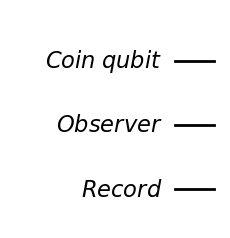

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr_qubit = QuantumRegister(1, name="Coin qubit")
qr_obs = QuantumRegister(1, name="Observer")
qr_rec = QuantumRegister(1, name="Record")

qc = QuantumCircuit(qr_qubit, qr_obs, qr_rec)

qc.draw("mpl")

All the qubits are initialised in the 0 state. So first, I'll apply a Hadamard gate to prepare the quantum coin in an equal superposition of 0 and 1:

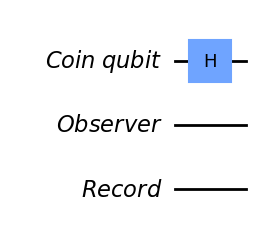

In [2]:
qc.h(0)

qc.draw("mpl")

$$H|0\rangle = \frac{1}{2}(|0\rangle + |1\rangle)$$

The coin qubit is now in a plus state, which is like the coin spinning clockwise. 

Then, the observer detects the state of the quantum coin. 

Let's first consider the no collapse case, where the observer's quantum measurement can be reversed.

Our observer here is a quantum system that becomes entangled with the coin qubit upon measurement, so we can directly model the measurement using a CNOT gate. If the outcome is 0 then the observer's memory stays as 0, and if the outcome is 1 then the observer's memory flips to 1. The coin qubit and observer jointly enter an entangled Bell state:

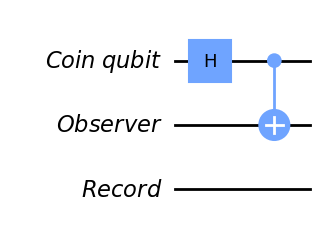

In [3]:
qc.cx(0, 1)
qc.draw("mpl")

$$CNOT\frac{1}{2}(|0\rangle + |1\rangle)|0\rangle = \frac{1}{2}(|00\rangle + |11\rangle)$$

Now we perform a "parity check" on the Coin qubit and Observer qubits, so we can check to see if the observer’s memory of the qubit's state is correct. This information will be stored in the record qubit, which plays the role of the piece of paper where the observer writes down the phrase "I made a measurement". It gives us a permanent record of the fact that the observer really did make a measurement. It's important that the information about the actual measurement outcome is not stored in the Record qubit, so that it stays intact when we later reverse the measurement.

We can implement the parity check using CNOT and anti-CNOT gates, like this: 

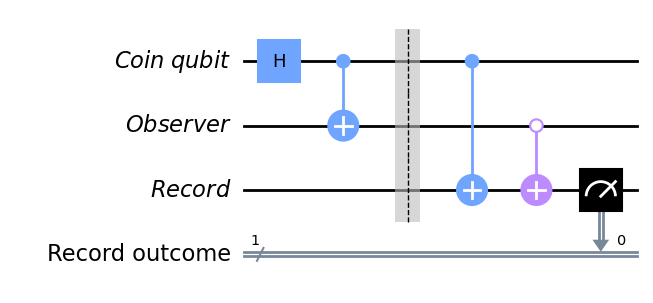

In [4]:
qc.barrier()

qc.cx(0, 2)

from qiskit.circuit.library.standard_gates import XGate
acx = XGate().control(1, ctrl_state='0')
qc.append(acx, [1, 2])

cr_record = ClassicalRegister(1, name="Record outcome")
qc.add_register(cr_record)

qc.measure(2, 0)

qc.draw("mpl")

If the qubits are the same, both 0 or both 1, then exactly one of the X-gates on the Record qubit will be implemented and it will flip to the 1 state. Alternatively, if the Observer has the wrong knowledge of the Coin qubit's state and the coin qubit and Observer states are different, then either both or neither of the X gates will be implemented on the Record qubit, and it will be in the 0 state.

If we always get an outcome of 1 when we measure the Record qubit, that indicates that the observer made the measurement correctly.

### Undoing the measurement 

To model the last part of the thought experiment, we apply a CNOT gate to undo the observer's measurement, unentangling the observer from the qubit (for a discussion of what exactly it means to unentangle an observer from a qubit, see the end of the accompanying video).

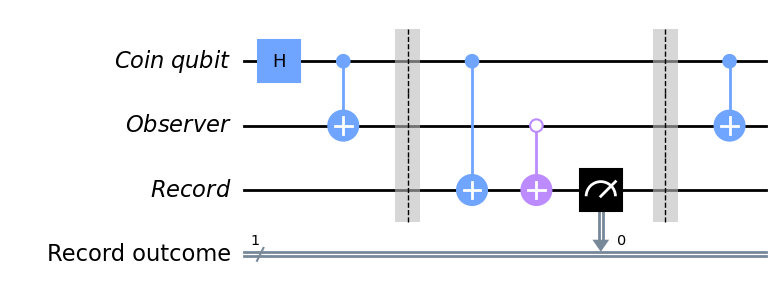

In [5]:
qc.barrier()
qc.cx(0, 1)
qc.draw("mpl")

This is like returning the coin to spinning clockwise. 

Now we need to measure whether or not the qubit is back in a plus state. To do this, we apply a Hadamard gate to turn it into a 0, then a Z-measurement:

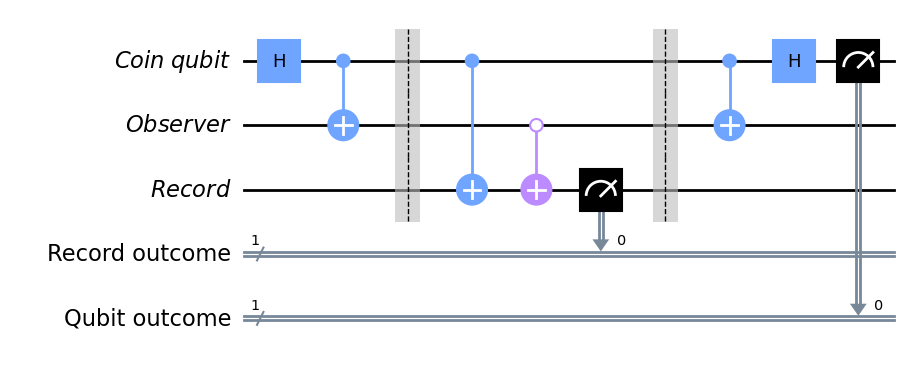

In [6]:
cr_qubit = ClassicalRegister(1, name="Qubit outcome")
qc.add_register(cr_qubit)

qc.h(0)
qc.measure(0, 1)

qc.draw("mpl")

If we simulate this circuit, we should always get an outcome of 0 on the qubit, and an outcome of 1 on the Record. This indicates that the observer truly made a measurement, and yet, the measurement was reversed. A deterministic outcome of 0 every time we run this experiment would therefore be evidence for the no-collapse theory. Let's try it out!

{'0 1': 1024}


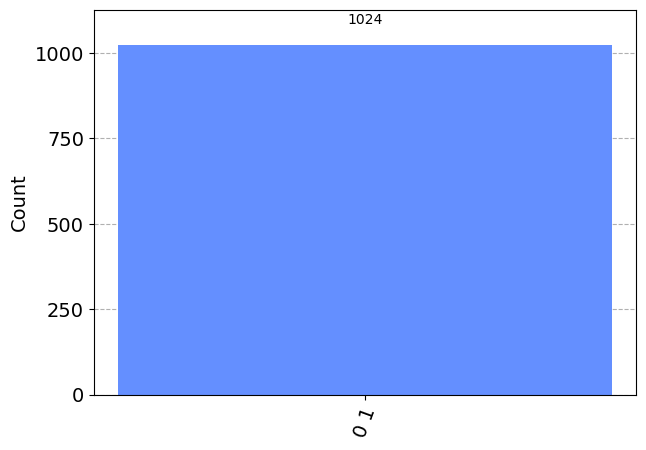

In [7]:
from qiskit import transpile

from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)

result = backend.run(qc_transpiled).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

As expected, the outcome is always 1 on the Record and 0 on the qubit, when we treat the observer's measurement as a reversible entangling CNOT gate. 

What about the collapse case? To model collapse, we need to enforce an irreversible measurement in the circuit. So after the CNOT gate between the Coin qubit and the Observer, let's add a mid-circuit measurement on the observer. This will cause them to irreversibly collapse into either the 0 state or the 1 state, destroying the coin qubit and observers' coherence. If you're familiar with density matrices, in this case the joint state of the coin qubit and Observer becomes:

$$\frac{1}{2}|00\rangle \langle 00| + \frac{1}{2}|11\rangle \langle 11|$$

Let's see how this changes our quantum circuit: 

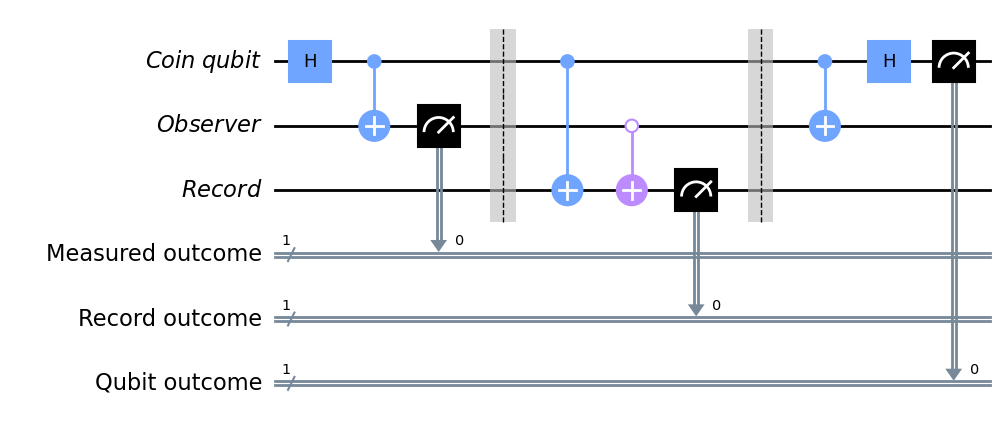

In [8]:
cr_measured = ClassicalRegister(1, name="Measured outcome")
qc = QuantumCircuit(qr_qubit, qr_obs, qr_rec, cr_measured, cr_record, cr_qubit)
qc.h(0)
qc.cx(0, 1)
qc.measure(1, 0)
qc.barrier()
qc.cx(0, 2)
from qiskit.circuit.library.standard_gates import XGate
acx = XGate().control(1, ctrl_state='0')
qc.append(acx, [1, 2])
qc.measure(2, 1)
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 2)

qc.draw("mpl")

This time, the Record will still say 1, indicating that a measurement was made. But the final gates that reverse the measurement and return the qubit to the 0 state will not work: the qubit was irreversibly collapsed to the 0 or 1 state, and so the final Hadamard will actually put it into a superposition of 0 and 1, instead of returning it to the 0 state. Using the coin analogy, it returns to spinning clockwise half the time and anti-clockwise half the time. 

This means that if we run this experiment lots of times, then half the time we will measure 0, and half the time we will measure 1. Let's see if this happens when we run the circuit: 

{'1 1 0': 240, '0 1 1': 265, '0 1 0': 270, '1 1 1': 249}


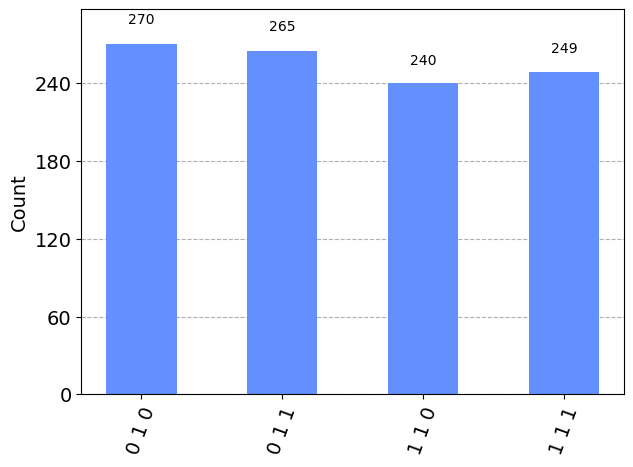

In [9]:
qc_transpiled = transpile(qc, backend)

result = backend.run(qc_transpiled).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

We see now that the Record qubit is always 1, the mid-circuit measurement of the qubit is 0 half the time and 1 half the time, and the final measurement of the qubit is 0 half the time and 1 half the time. By comparing this even distribution of outcomes on the first qubit in the irreversible measurement case to the deterministic outcome of 0 on the first qubit in the reversible measurement case, we could, at least in principle, experimentally distinguish collapse and no collapse!

Notice that whether the collapse or no-collapse model is true, we don't have a true paradox here. Within this thought experiment, each theory is self-consistent and will lead to self-consistent results. 

However, there is a more recent thought experiment, proposed in 2016, which claims to have truly found a contradiction when we attempt to model observers using quantum mechanics. To find out about this quantum paradox and decide whether you think it exposes a true contradiction in our current version of quantum theory, watch our next video on "Wigner's friend of a friend of a friend"! See you next time. 